**NB:** This notebook was created using **Google Colab** 

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/A2-insights/Covid19-Data-Insights/blob/master/notebooks/A2_insights_Lab_Covid19_EDA.ipynb)




# **$A^{2}$ Insights Lab** *presents*

The COVID-19 informative analysis crafted using python, pandas and other modern technologies. 

---
## **Disclaimer**

The information contained in this Notebook is for **Educational purposes only**. The Data Analysis and code is provided by **$A^{2}$ Insights Lab**, Conclusions or point of views made from this notebook should be interpreted as Opinoins and not as health professional advice. **Any reliance you place on such information is therefore strictly at your own risk.**

**We Do not Claim** ownership nor correctness of the data used, therefore 
In no event will we be liable for any violation of the government Regulations or damage including without limitation, indirect or consequential loss or damage whatsoever arising from loss of data or misleading information, or in connection with, the use of this information.
<br>

# **Imports**

In [0]:
# Data manipulation 
import pandas as pd 
import numpy as np
import requests

#  Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Extas
import warnings

# Disabling library Warnings
warnings.filterwarnings('ignore')

# Out Put Settings, precision
pd.set_option('precision', 3)

# **Loading Data** 


---

**API starter:**
>Use this notebook to connect to the COVID-19 database for access to our datasources.

>Use [these API's](https://ijvcpr9af1.execute-api.eu-west-1.amazonaws.com/api/) to access the data.
---
## Build a dataframe using the following code:

```url = "INSERT API URL"``` <br>
```headers = {'x-api-key': "INSERT API KEY HERE"}```<br>
```response = requests.request("GET", url, headers=headers)```<br>
```x = response.json()```<br>
```df = pd.DataFrame(x)```

## **Call the following function to read the data To a Dataframe**


```
load_covid19(url, API_KEY)
```


<br>
<br>


## CONSTANTS

In [0]:
# CONSTANTS
API_KEY = 'WVllUkRA01awNNgKxGg607vl5qIvuOAN3pW9HXmD'

# External Data Sources URLs
SYMPTOMS_URL = 'https://en.wikipedia.org/wiki/Coronavirus'

# FULL GLOBAL DATASETS
GLOBAL_URL = 'https://raw.githubusercontent.com/owid/covid-19-data/blob/master/public/data/ecdc/full_data.csv'

# GLOBAL DATA TO BE MERGED
LOCATIONS_URL = 'https://raw.githubusercontent.com/owid/covid-19-data/blob/master/public/data/ecdc/locations.csv'
CONFIRMED_URL = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
RECOVERED_URL = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
DEATHS_URL = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'

# SOUTH AFRICA DATASETS
RSA_URL =  'https://raw.githubusercontent.com/dsfsi/covid19za/blob/master/data/covid19za_provincial_cumulative_timeline_confirmed.csv'

# DISTRICT DATA
WESTERN_CAPE_URL = 'https://raw.githubusercontent.com/dsfsi/covid19za/blob/master/data/district_data/provincial_wc_cumulative.csv'
GAUTENG_URL = 'https://raw.githubusercontent.com/dsfsi/covid19za/master/data/district_data/provincial_gp_cumulative.csv'


# API URLs
url_CasesGlobalView = 'https://9gnht4xyvf.execute-api.eu-west-1.amazonaws.com/api/get_table/CasesGlobalView'
url_CasesLocalView  = 'https://9gnht4xyvf.execute-api.eu-west-1.amazonaws.com/api/get_table/CasesLocalView'
ulr_CounterMeasureView = 'https://9gnht4xyvf.execute-api.eu-west-1.amazonaws.com/api/get_table/CounterMeasureView'

## **GATHER EXTERNAL DATA**
---

Functions to gather data from other sources[link text](https://)


In [0]:
def scrape_covid19_symptoms(url):
    """scrape_covid19_symptoms(url)
    
    Scrapes covid 19 symptoms from wikipedia coronavirus pages
    
    PARAMETERS: 
        url (string): wikipedia coronavirus url page
    """

    # get all tables and extract covid 19 symptoms table
    df = pd.read_html(url, header=None)
    df = df[1][11:17].loc[: , ['Unnamed: 0', 'SARS-CoV-2'] ].reset_index().drop('index', axis=1)
    df.rename(columns={'Unnamed: 0': 'symptoms', 'SARS-CoV-2': 'covid19_percentage'}, inplace= True)
    
    return df

In [0]:
def load_covid19(url, API_KEY = 'WVllUkRA01awNNgKxGg607vl5qIvuOAN3pW9HXmD' ):
  """load_covid19(url)

  DESCRIPTION:
        The function reads in an API URL for COVID-19 Data and returns a pandas DataFrame.

  PARAMETERS:
        url (string): API URL.

  RETURNS:
      (DataFrame): Data in a form of a pandas dataframe.
  
  """

  headers = {
    'x-api-key': API_KEY
    }
  response = requests.request("GET", url, headers=headers)
  x = response.json()

  return pd.DataFrame(x)

## **Load Data to DataFrames**
---
Calling functions to lead data

In [0]:
# Reading Data to DataFrames
global_view = load_covid19(url_CasesGlobalView)
local_view = load_covid19(url_CasesLocalView)
counterMeasure_view = load_covid19(ulr_CounterMeasureView)


In [0]:
# loading covid 19 symptoms dataframe
symptoms_df = scrape_covid19_symptoms(SYMPTOMS_URL)

# **Domain Knowledge & Few Data Checks**
 *Quick Descriptive Analysis, Data Values & Data Types*

---
Lets get to understand the **Features** and **Categorical** values.
- The **cardinality of Categorical Features** might not change as the data increases.
- **investigate Categorical Features :**
  - country
  - province/state/region
  - measures
  - and more if any
---
- **investigate the Data type per Feature:**
  - **Date** (format)
  - **floats** stored as **objects** or vice versa
  - **Down cast data types** to **pandas data types** which **reduce memory usage**.
---
- **Investigate Feature Values:**

  - **Missing Data values**
    - missing at Random
    - missing by aggregation
    - indicated as missing but the actual value is Zero.
 - **non-atomic Features & format:**
    - Create a new Feature
    - Remove part of the data
    - Use **iso_** features to correct cuntries.
--- 


## **CasesGlobalView**

In [0]:
# Dimension of the global_view data
print(f'The global  Instances are : {global_view.shape[0]}')
print(f'The global  Features are  : {global_view.shape[1]}')

The global  Instances are : 8903
The global  Features are  : 14


In [0]:
# view 5 samples of the data
global_view.sample(5)

,date,country,lat,long,confirmed,deaths,recovered,active,confirmed_daily,deaths_daily,recovered_daily,daily_change_in_active_cases,active_dailiy_growth_rate,active_rolling_3_day_growth_rate
5074,2020-04-14,Malaysia,2.500,112.500,4987,82,2478,2427,170.0,5.0,202.0,-37.0,-0.015,-0.005
1645,2020-03-06,Chile,-35.675,-71.543,4,0,0,4,0.0,0.0,0.0,0.0,0.000,0.587
3755,2020-04-15,India,21.000,78.000,12322,405,1432,10485,835.0,12.0,73.0,750.0,0.077,0.104
6738,2020-04-18,Rwanda,-1.940,29.874,144,0,69,75,1.0,0.0,4.0,-3.0,-0.038,-0.029
4178,2020-02-05,Japan,36.000,138.000,22,0,1,21,0.0,0.0,0.0,0.0,0.000,0.034


In [0]:
# understanding global view columns
global_cols = global_view.columns.to_list()
global_cols

['date',
 'country',
 'lat',
 'long',
 'confirmed',
 'deaths',
 'recovered',
 'active',
 'confirmed_daily',
 'deaths_daily',
 'recovered_daily',
 'daily_change_in_active_cases',
 'active_dailiy_growth_rate',
 'active_rolling_3_day_growth_rate']

In [0]:
# data types per Feature, Memeory size
global_view.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8903 entries, 0 to 8902
Data columns (total 14 columns):
date                                8903 non-null object
country                             8903 non-null object
lat                                 8903 non-null float64
long                                8903 non-null float64
confirmed                           8903 non-null int64
deaths                              8903 non-null int64
recovered                           8903 non-null int64
active                              8903 non-null int64
confirmed_daily                     8718 non-null float64
deaths_daily                        8718 non-null float64
recovered_daily                     8718 non-null float64
daily_change_in_active_cases        8718 non-null float64
active_dailiy_growth_rate           8517 non-null float64
active_rolling_3_day_growth_rate    8148 non-null float64
dtypes: float64(8), int64(4), object(2)
memory usage: 973.9+ KB


In [0]:
# get count for null values
global_view.isnull().mean()

date                                0.000
country                             0.000
lat                                 0.000
long                                0.000
confirmed                           0.000
deaths                              0.000
recovered                           0.000
active                              0.000
confirmed_daily                     0.021
deaths_daily                        0.021
recovered_daily                     0.021
daily_change_in_active_cases        0.021
active_dailiy_growth_rate           0.043
active_rolling_3_day_growth_rate    0.085
dtype: float64

**Notes 2** Missing Data:
> We need to understand the Nature of missing values before we can drop the records or impute the values. 

> NB: Imputaion / droping records with missing values may yeild misleading results and may affect the interpretation of the pandemic outbreak. 

The following columns have more less **10%** missing values out of current loaded observations :
* confirmed_daily                    
* deaths_daily                   
* recovered_daily                 
* daily_change_in_active_cases     
* active_dailiy_growth_rate       
* active_rolling_3_day_growth_rate

In [0]:
# Eliminate the Logitude and latitude the view the summary statistics
global_view.drop(['lat','long'], axis=1).describe()

,confirmed,deaths,recovered,active,confirmed_daily,deaths_daily,recovered_daily,daily_change_in_active_cases,active_dailiy_growth_rate,active_rolling_3_day_growth_rate
count,8903.000,8903.000,8903.000,8903.000,8718.000,8718.000,8718.000,8718.000,8517.000,8148.000
mean,5033.470,287.959,1245.491,3500.021,283.471,19.496,74.066,189.909,0.180,0.137
std,30288.755,1920.600,7515.722,24564.496,1744.333,132.177,438.011,1457.232,0.700,0.235
min,1.000,0.000,0.000,0.000,-9015.000,-31.000,-849.000,-10382.000,-1.000,-1.000
25%,9.000,0.000,0.000,7.000,0.000,0.000,0.000,0.000,0.000,0.004
50%,73.000,1.000,4.000,57.000,6.000,0.000,0.000,3.000,0.044,0.079
75%,706.000,11.000,55.000,606.000,54.000,1.000,4.000,34.000,0.167,0.197
max,784326.000,42094.000,91500.000,669903.000,35098.000,4591.000,10980.000,29957.000,37.000,2.733


**Notes 3**
> Understanding the **mean**, **std** and **MAx** for the following features/ Variables:
- **confirmed**
- **deaths** 	
- **recovered**

> **Ideal Scenario**
* The **std** and **mean** for **confirmed** and **deaths** are expected  to have a very high variation, this will mean that the virus **preading-rate** and **death-rate** are droping(flaterning the  curve).
* The **std** and **mean** for **Recovered** are expected to have a less to no variation and this will mean that more people are recovering at a short period of time.[[1]('')]




In [0]:
# get number of countries 
global_view['country'].nunique()

185

**notes #**

we got **185 countries**, this should be considered when ploting vs country.


## **CasesLocalView**

In [0]:
# Dimension of the global_view data
print(f'The local  Instances are : {local_view.shape[0]}')
print(f'The local  Features are  : {local_view.shape[1]}')

The local  Instances are : 455
The local  Features are  : 6


In [0]:
# view 5 samples of the local view data
local_view.sample(5)

,id,country_id,location,location_level,date,confirmed
128,3,153,GP,Provincial,2020-04-18,1101
310,7,153,NC,Provincial,2020-04-20,18
425,10,153,UNKNOWN,Provincial,2020-03-30,96
74,2,153,FS,Provincial,2020-03-13,0
343,8,153,NW,Provincial,2020-03-12,0


In [0]:
# data types
local_view.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455 entries, 0 to 454
Data columns (total 6 columns):
id                455 non-null int64
country_id        455 non-null int64
location          455 non-null object
location_level    455 non-null object
date              455 non-null object
confirmed         455 non-null int64
dtypes: int64(3), object(3)
memory usage: 21.5+ KB


In [0]:
# get count for Missing Data
local_view.isnull().mean()

id                0.0
country_id        0.0
location          0.0
location_level    0.0
date              0.0
confirmed         0.0
dtype: float64

In [0]:
# Remove the id & country_id Features since they are not informative on the summary statistics
local_view.drop(['id','country_id'], axis=1).describe()

,confirmed
count,455.000
mean,110.662
std,224.037
min,0.000
25%,0.000
50%,15.000
75%,86.000
max,1170.000


In [0]:
# group by location and get the size 
local_view.groupby('location').size()

location
EC         45
FS         45
GP         45
KZN        45
LP         45
MP         45
NC         45
NW         45
UNKNOWN    45
WC         45
source      5
dtype: int64

## **CounterMeasureView**

In [0]:
# Dimension of the global_view data
print(f'The Counter Measure  Instances are : {counterMeasure_view.shape[0]}')
print(f'The Counter Measure  Features are  : {counterMeasure_view.shape[1]}')


The Counter Measure  Instances are : 27390
The Counter Measure  Features are  : 4


In [0]:
# view 5 samples of the Counter Measure View data
counterMeasure_view.sample(5)

,date,country,measure,value
13862,2020-01-24,Japan,Healthcare specialisation,0.0
8905,2020-03-29,Germany,Asymptomatic isolation - blanket,2.0
12823,2020-03-29,Italy,Asymptomatic isolation - blanket,3.0
22380,2020-02-05,South Africa,Public education and incentives,0.0
14102,2020-02-21,Japan,Testing,2404.0


In [0]:
# data type per  Feature and memory size
counterMeasure_view.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27390 entries, 0 to 27389
Data columns (total 4 columns):
date       27390 non-null object
country    27390 non-null object
measure    27390 non-null object
value      27390 non-null float64
dtypes: float64(1), object(3)
memory usage: 856.1+ KB


In [0]:
# cheget the % of missing values
counterMeasure_view.isnull().mean()

date       0.0
country    0.0
measure    0.0
value      0.0
dtype: float64

In [0]:
# Summary statisctics
counterMeasure_view.describe()

,value
count,27390.000
mean,1251.294
std,15497.751
min,0.000
25%,0.000
50%,0.000
75%,0.000
max,320000.000


In [0]:
# investigate the number of measures
counterMeasure_view['measure'].nunique()

23

**Notes #**

we got **23 measures**,So need to be careful when using scatter plots and not cluster by measures.

## **Symptoms Data**

In [0]:
# Dimension of the symptoms_df data
print(f'The Symptoms  Instances are : {symptoms_df.shape[0]}')
print(f'The Symptoms Features are  : {symptoms_df.shape[1]}')

The Symptoms  Instances are : 6
The Symptoms Features are  : 2


In [0]:
# view data samples
symptoms_df

,symptoms,covid19_percentage
0,Fever,87.9%[69]
1,Dry cough,67.7%[69]
2,Dyspnea,18.6%[69]
3,Diarrhea,3.7%[69]
4,Sore throat,13.9%[69]
5,Ventilatory use,4.1%[71]


clean up the % and extra numbers

In [0]:
# data types 
symptoms_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
symptoms              6 non-null object
covid19_percentage    6 non-null object
dtypes: object(2)
memory usage: 224.0+ bytes


cast **percentage** to be a float not object

# **Data Preprocessing**


*   Cast the DATATYPES to reduce memory usage
*   Create pipeline To clean the Data
*   Pass all the data Stream through the pipeline



 ## **LOGIC**
---
custorm Functions to preprocess all the data 

In [0]:
def preprocess_symptoms_df(df):

    # preprocening the dataframe
    df.replace(regex=['%\[69]', '%\[71]'], value='', inplace=True)
    
    # cast object to float and reduce memory usage
    df.covid19_percentage = df.covid19_percentage.astype('float')

    return df

## **PREPROCESING** 
---




In [0]:
symptoms_df = preprocess_symptoms_df(symptoms_df)
symptoms_df

,symptoms,covid19_percentage
0,Fever,87.9
1,Dry cough,67.7
2,Dyspnea,18.6
3,Diarrhea,3.7
4,Sore throat,13.9
5,Ventilatory use,4.1


# **Visualizations**

*Lets plan the charts so as to better group them based on the information then convey.*

---
**Groups of Plots:**
1.   Summary plots e.g pie charts
2.   Trends plots (Time series)
2.   Distribution plots
3.   Relationship plots
---

1.  **Trends:**
- **investigate by date of report** (chart Type = ?) time series
    - Total deaths, recovered and confirmed vs date of report
    - daily deaths, recovered and confirmed vs date of report
---
2.   **Distribution plots:**
- **investigate by country**
     - deaths vs country
     - recovered vs country
     - confirmed vs country
- **investigate by province**

- **investigate by measures**

 ---







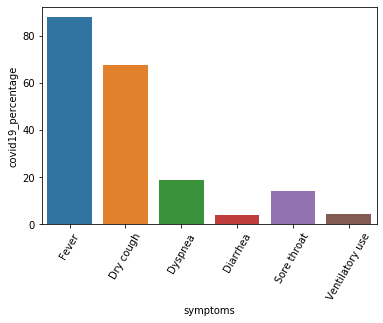

In [0]:
## plotting the symptoms VS covid19_percentage
plt.title('plotting the symptoms VS covid19_percentage')
sns.barplot(x=symptoms_df['symptoms'],y=symptoms_df['covid19_percentage']);
plt.xticks(rotation=60)


**Interpretation:**
---
*According to our dataset, a patiant suffering from fever has a high probability of having covid19.*

# **Future Tasks**

- creating a PipeLine Api to pull all the data to our open source covid 19 data repo.

- creating dynamic visuals (power Bi/ Data Studio/ tablue)
- hosting them on the internet
- creating ML and DL models to continuesly train and predict the trend of covid 19
- perform batch and online training for our model.
- plot and publish the model results and its logs. 
- Automating the pipeline API for CI and CD life cycle.
- contribute to UCI data portal or any other portal
- Helping people Study the data easy

### You're Welcome to Join Our GitHub Community.


# **Credits & Sources**
*We would like to Acknowledge the sources listed below for data, Inpiration and domain knowledge.* 

---
### **Data Sources** with data updates time
1. [westerncape.gov.za](https://www.westerncape.gov.za/department-of-health/coronavirus)
2.  [Data Science for Social Impact research group](https://dsfsi.github.io/)
3. [CSSE at Johns Hopkins University](https://systems.jhu.edu/)
4. [ourworldindata.org](https://ourworldindata.org/coronavirus)

---
### **Blogs**
1. [The National Center for Health Statistics]('https://nces.ed.gov/') 


---
### **Books**
 
 1. books here.

---
### **Research papers**

1. papers here.
---

# THANK YOU
Please post any questions on our github project by creating an **issue** and if you found this project informative, give us a **star** and **follow** our ***github organization & profiles***.

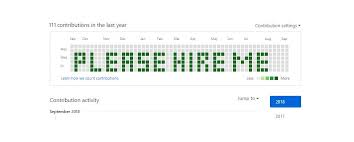
---